<a href="https://colab.research.google.com/github/SamuelAlmanza17/proyecto_samuel/blob/main/Clase_15%2C16%2C17%2C18_1_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('housingData.csv')

# Mostrar las primeras filas del DataFrame para asegurarte de que se ha cargado correctamente
print(df.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [ ]:
df.tail(5) #Retorna las ultimas n filas


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


<Axes: xlabel='latitude', ylabel='longitude'>

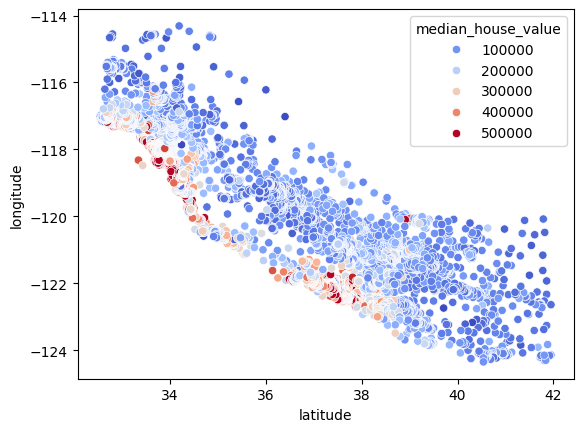

In [ ]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=df, hue="median_house_value", palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

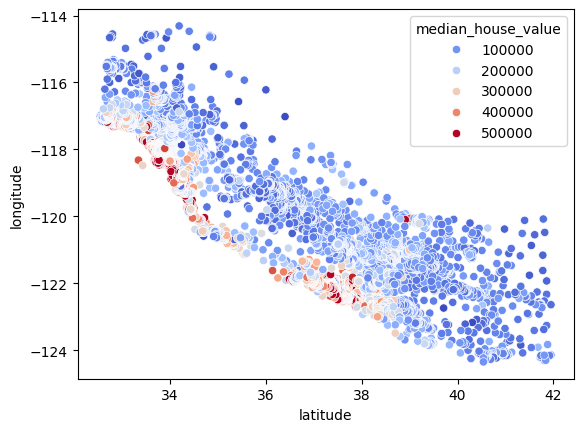

In [ ]:
import seaborn as sb
sb.scatterplot(x="latitude", y="longitude", data=df, hue="median_house_value", palette="coolwarm") # Changed 'datos' to 'df'

<Axes: xlabel='latitude', ylabel='longitude'>

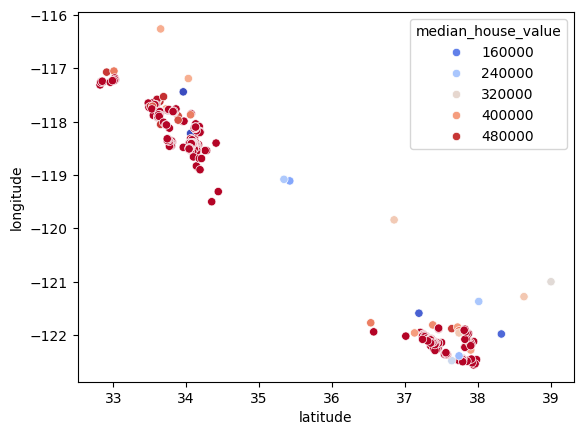

In [ ]:
sb.scatterplot(x="latitude", y="longitude", data=df[(df.median_income > 10)], hue="median_house_value", palette="coolwarm")

In [ ]:
df_nulos = df.dropna() #limpiar los campos vacios en una copia
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
print(df['ocean_proximity'].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [ ]:
df_nulos["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [ ]:
#Dummies / One-Hot Encoding - cambiar los nombres en texto a numeros
dummies_ocean = pd.get_dummies(df_nulos["ocean_proximity"], dtype=int)
(dummies_ocean)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [ ]:
#Dummies / One-Hot Encoding - cambiar los nombres en texto a numeros
dummies_ocean = pd.get_dummies(df_nulos["ocean_proximity"], dtype=int)
df_nulos = df_nulos.join(dummies_ocean)
(df_nulos.head)

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0            NEAR BAY          0       0       0         1           0  
1            NEAR BAY          0       0       0         1           0  
2            NEAR BAY          0       0       0         1           0  
3            NEAR BAY          0       0       0         1           0  
4            NEAR BAY          0       0       0         1           0  
...               ...        ...     ...     ...       ...         ...  
20635          INLAND          0       1       0         0           0  
20636          INLAND          0       1       0         0           0  
20637          INLAND          0       1       0         0           0  
20638          INLAND          0       1       0         0           0  
20639          INLAND          0       1       0         0           0  

[20433 rows x 15 columns]>

In [ ]:
#Original Code:
#df_nulos = df_nulos.join(dummies_ocean)

#Fix: Add suffixes for overlapping columns.
df_nulos = df_nulos.join(dummies_ocean, lsuffix='_caller', rsuffix='_other')
# '_caller' and '_other' are arbitrary suffixes.
# Choose suffixes that make sense for your dataset.

df_nulos.head()
df_nulos = df_nulos.drop("ocean_proximity", axis=1)
df_nulos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN_caller,INLAND_caller,ISLAND_caller,NEAR BAY_caller,NEAR OCEAN_caller,<1H OCEAN_other,INLAND_other,ISLAND_other,NEAR BAY_other,NEAR OCEAN_other
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,0,0,0,1,0


,median_house_value
median_house_value,1.000000
median_income,0.688355
<1H OCEAN_caller,0.257614
<1H OCEAN_other,0.257614
NEAR BAY_other,0.160526
NEAR BAY_caller,0.160526
NEAR OCEAN_caller,0.140378
NEAR OCEAN_other,0.140378
total_rooms,0.133294
housing_median_age,0.106432


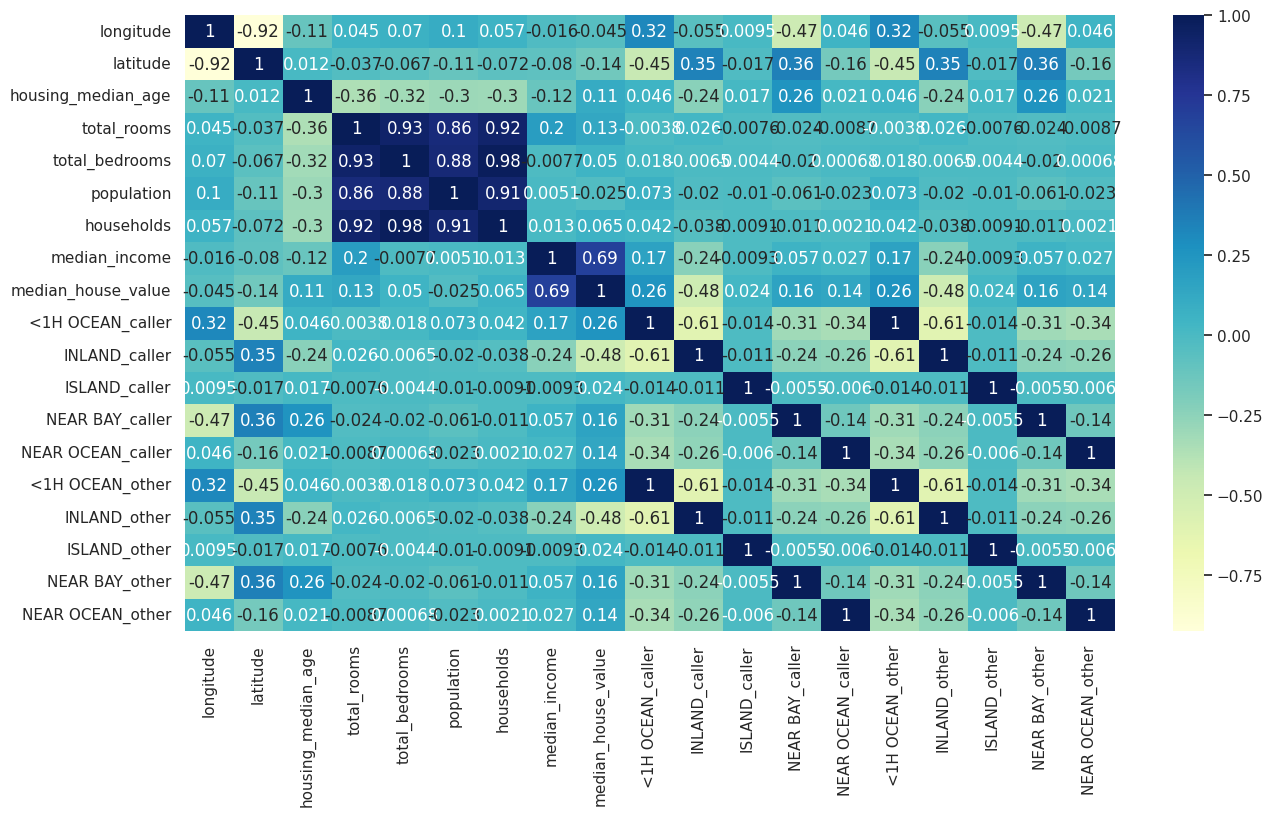

In [ ]:
df_nulos.corr() #mapa de calor
sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(df_nulos.corr(), annot=True, cmap="YlGnBu")
df_nulos.corr()["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688355
<1H OCEAN_caller,0.257614
<1H OCEAN_other,0.257614
NEAR BAY_other,0.160526
NEAR BAY_caller,0.160526
NEAR OCEAN_caller,0.140378
NEAR OCEAN_other,0.140378
total_rooms,0.133294
housing_median_age,0.106432


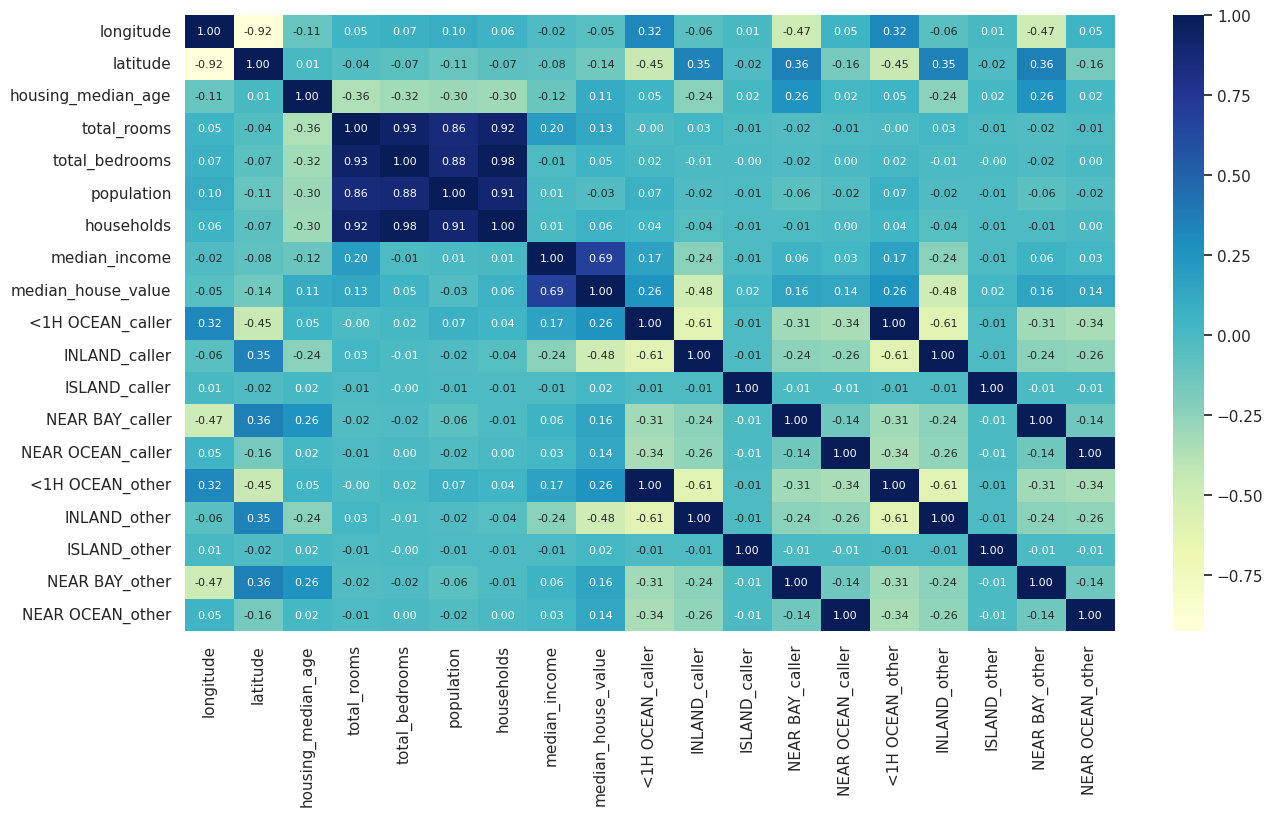

In [ ]:
df_nulos.corr() #mapa de calor
sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(df_nulos.corr(), annot=True, cmap="YlGnBu", fmt=".2f", annot_kws={"size": 8})
df_nulos.corr()["median_house_value"].sort_values(ascending=False)



```
# Esto tiene formato de código
```

**REGRESIÓN LINEAL** modelo supervisado

In [ ]:
X = df_nulos.drop("median_house_value", axis=1)
Y = df_nulos["median_house_value"]

In [ ]:
from sklearn.model_selection import train_test_split
X_entrena, X_prueba, Y_entrena, Y_prueba = train_test_split(X, Y, test_size=.2) #El porcentaje que se van a usar para las pruebas (20%)

In [ ]:
X_entrena.shape #muestra la cantidad de registros y columnas

(16346, 18)

In [ ]:
Y_entrena.shape #las columnas salio vacio por que solo hay una columna

(16346,)

In [ ]:
from sklearn.linear_model import LinearRegression #plantea el modelo de regresion lineal y le entregamos los datos de entrenamiento

modelo=LinearRegression()
modelo.fit(X_entrena, Y_entrena)


LinearRegression()

El modelo ya entrenó con los datos de entrenamiento, ahora se le pasan los datos de prueba

In [ ]:
prediccion = modelo.predict(X_prueba)
print(prediccion)

[ 32216.25982167 180846.71237927 177458.6413682  ... 112003.59139151
 241572.75517626 267781.21851802]


Está prediciendo un valor de cada casa, ahora se analizan los resultados con la realidad y se ajusta el modelo con las necesidades


In [ ]:
comparativa = {"Prediccion": prediccion, "Valor Real": Y_prueba}
pd.DataFrame(comparativa)

,Prediccion,Valor Real
18838,32216.259822,57500.0
9869,180846.712379,112800.0
259,177458.641368,102000.0
19412,333930.141021,435000.0
5621,149429.200357,152300.0
...,...,...
337,176698.005776,84200.0
19128,229365.772899,306000.0
13675,112003.591392,85700.0
5671,241572.755176,326700.0


In [ ]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

16-1-25

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_prueba, prediccion)
mse

4759490985.978946

In [ ]:
mse = mean_squared_error(Y_prueba, prediccion)
print(mse)

4759490985.978946


Raiz cuadrada del error RMSE

In [ ]:
import numpy as np  # Import NumPy with the alias 'np'

rmse = np.sqrt(mse)  # Now you can use np.sqrt()
print(rmse)

68989.06424919057


In [ ]:
# Evaluar el modelo con validación cruzada (métrica: error cuadratico)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, X, Y, cv=10, scoring='neg_mean_squared_error')
scores

array([-7.24502785e+09, -3.51492494e+09, -7.75863533e+09, -3.93664635e+09,
       -6.55869575e+09, -4.87535622e+09, -2.74473835e+09, -8.32708418e+09,
       -6.04058885e+09, -2.86360587e+09])

In [ ]:
# Evaluar el modelo con validación cruzada (métrica: error cuadratico)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, X, Y, cv=10, scoring='neg_mean_squared_error')
scores

array([-7.24502785e+09, -3.51492494e+09, -7.75863533e+09, -3.93664635e+09,
       -6.55869575e+09, -4.87535622e+09, -2.74473835e+09, -8.32708418e+09,
       -6.04058885e+09, -2.86360587e+09])

In [ ]:
def mostrar_scores(scores):
    print("Puntajes de MSE en cada fold:", scores)
    print("Promedio de MSE:", np.mean(scores))
    print("Desviación estándar de MSE:", np.std(scores))

Modelo arbol de desición - Decision Tree Regresor

Se realizó el modelo y se probó con los mismos datos de prueba del modelo 1

In [ ]:

# Evaluar el modelo con validación cruzada (métrica: error cuadratico)
scores = cross_val_score(modelo, X, Y, cv=10, scoring='neg_mean_squared_error')

import numpy as np  # Import NumPy with the alias 'np'

rmse = np.sqrt(scores)  # Now you can use np.sqrt()


def mostrar_scores(scores):
    print("Puntajes de MSE en cada fold:", scores)
    print("Promedio de MSE:", np.mean(scores))
    print("Desviación estándar de MSE:", np.std(scores))

mostrar_scores(rmse)

Puntajes de MSE en cada fold: [nan nan nan nan nan nan nan nan nan nan]
Promedio de MSE: nan
Desviación estándar de MSE: nan


<ipython-input-33-e5371d28c4f0>:6: RuntimeWarning: invalid value encountered in sqrt
  rmse = np.sqrt(scores)  # Now you can use np.sqrt()


Random Forest - Modelo 2

In [ ]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler  # Import StandardScaler


# ... your other code ...


# Before fitting the RandomForestRegressor:
# Scale the training data using StandardScaler
scaler = StandardScaler()
X_entrena_escalado = scaler.fit_transform(X_entrena)  # Create X_entrena_escalado


# Now you can fit the model:
modeloRandomF = RandomForestRegressor(n_estimators=100, random_state=42)
modeloRandomF.fit(X_entrena_escalado, Y_entrena)

# ... rest of your code ...

RandomForestRegressor(random_state=42)

In [ ]:

import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('housingData.csv')

# ... (resto del código de preprocesamiento de datos) ...

# Random Forest - Modelo 2
modeloRandomF = RandomForestRegressor(n_estimators=100, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_entrena_escalado = scaler.fit_transform(X_entrena)

modeloRandomF.fit(X_entrena_escalado, Y_entrena)

# Evaluar el modelo con validación cruzada
scores = cross_val_score(modeloRandomF, scaler.transform(X), Y, cv=10, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-scores) # Se aplica la raíz cuadrada a los valores negativos de MSE

def mostrar_scores(scores):
    print("Puntajes de RMSE en cada fold:", scores)
    print("Promedio de RMSE:", np.mean(scores))
    print("Desviación estándar de RMSE:", np.std(scores))

mostrar_scores(rmse_scores)

Puntajes de RMSE en cada fold: [106156.4897828   48691.62168505  70275.52338511  59960.61010075
  62428.03382264  66626.2235928   49132.95797275  86168.50368663
  80994.3989277   54930.35572275]
Promedio de RMSE: 68536.47186789846
Desviación estándar de RMSE: 17188.155329963618


Puntajes de RMSE en cada fold: [106156.4897828   48691.62168505  70275.52338511  59960.61010075
  62428.03382264  66626.2235928   49132.95797275  86168.50368663
  80994.3989277   54930.35572275]
Promedio de RMSE: 68536.47186789846
Desviación estándar de RMSE: 17188.155329963618


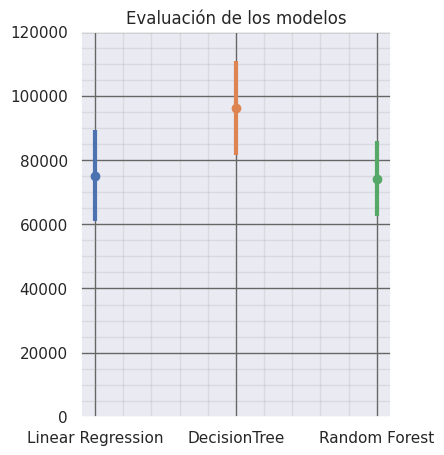

In [ ]:
# prompt: reemplaza y asigna los datos de promedio y desviación estandar de cada modelo que hice anteriormente en este código:
# # Datos de evaluación
# list_model = ['Linear Regression', 'DecisionTree', 'Random Forest']
# list_mean = [75125, 96237, 74244]
# list_sd = [14137, 14595, 11687]
# # Agregamos una gráfica para comparar visualmente los resultados
# import matplotlib.pyplot as plt
# plt.figure(figsize=(4, 5))
# for i in range(3):
#     plt.errorbar(i, list_mean[i], xerr=0, yerr=list_sd[i], fmt='o', linewidth=3)
# plt.xticks([0, 1, 2], list_model)
# plt.title("Evaluación de los modelos")
# plt.ylim(0, 120000)
# plt.grid(visible=True, which='major', color='#666666', linestyle='-')
# plt.minorticks_on()
# plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
# plt.show()

import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Datos de evaluación (reemplaza con tus datos reales)
list_model = ['Linear Regression', 'DecisionTree', 'Random Forest']
list_mean = [75125, 96237, 74244]
list_sd = [14137, 14595, 11687]

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('housingData.csv')

# ... (resto del código de preprocesamiento de datos) ...

# Random Forest - Modelo 2
modeloRandomF = RandomForestRegressor(n_estimators=100, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_entrena_escalado = scaler.fit_transform(X_entrena)

modeloRandomF.fit(X_entrena_escalado, Y_entrena)

# Evaluar el modelo con validación cruzada
scores = cross_val_score(modeloRandomF, scaler.transform(X), Y, cv=10, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-scores)

def mostrar_scores(scores):
    print("Puntajes de RMSE en cada fold:", scores)
    print("Promedio de RMSE:", np.mean(scores))
    print("Desviación estándar de RMSE:", np.std(scores))

mostrar_scores(rmse_scores)


# Agregamos una gráfica para comparar visualmente los resultados
plt.figure(figsize=(4, 5))
for i in range(3):
    plt.errorbar(i, list_mean[i], xerr=0, yerr=list_sd[i], fmt='o', linewidth=3)
plt.xticks([0, 1, 2], list_model)
plt.title("Evaluación de los modelos")
plt.ylim(0, 120000)
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ... (your code to load and preprocess the data) ...

# Assuming 'df' is your DataFrame containing the data:
# 1. Perform one-hot encoding on 'ocean_proximity' before splitting
df = pd.get_dummies(df, columns=['ocean_proximity'], dtype=int) # Convert 'ocean_proximity' to numerical using one-hot encoding

# 2. Define X and Y after one-hot encoding
X = df.drop("median_house_value", axis=1)  # Features (all columns except the target)
Y = df["median_house_value"]  # Target variable

# 3. Split data into training and testing sets
X_entrena, X_prueba, Y_entrena, Y_prueba = train_test_split(X, Y, test_size=0.2)

# 4. Now you can scale the data
scaler = StandardScaler()
X_entrena_escalado = scaler.fit_transform(X_entrena)
X_prueba_escalado = scaler.transform(X_prueba) # Use transform, not fit_transform, for test data

pd.DataFrame(X_entrena_escalado)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.277087,-1.311743,-0.925883,0.630090,0.326565,0.737331,0.426672,0.652675,1.121285,-0.680384,-0.015566,-0.355213,-0.383594
1,0.727393,-0.790771,0.577823,0.054135,-0.184485,-0.185108,-0.121720,0.611769,1.121285,-0.680384,-0.015566,-0.355213,-0.383594
2,-1.271493,1.020895,-0.213601,0.646076,-0.055528,0.056024,-0.001021,1.978304,-0.891834,-0.680384,-0.015566,2.815210,-0.383594
3,-1.451393,0.997428,1.844102,0.023076,0.090145,-0.023768,0.132797,0.015452,-0.891834,-0.680384,-0.015566,2.815210,-0.383594
4,-1.261499,0.959880,0.656965,-0.585308,-0.463890,-0.641066,-0.457577,-0.248818,-0.891834,-0.680384,-0.015566,2.815210,-0.383594
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.247103,-1.372757,-0.134459,-0.196161,0.147459,0.205088,0.059328,-1.251167,-0.891834,-0.680384,-0.015566,-0.355213,2.606920
16508,1.207126,-1.363370,1.844102,-0.646511,-0.155828,-0.527076,-0.182069,-1.001975,-0.891834,-0.680384,-0.015566,-0.355213,2.606920
16509,1.816786,-1.058297,-1.875592,-1.117872,-1.177927,-1.211014,-1.252615,-0.615718,-0.891834,1.469759,-0.015566,-0.355213,-0.383594
16510,-1.206529,0.804997,-1.005025,0.281137,0.980900,0.188428,0.898972,0.345725,1.121285,-0.680384,-0.015566,-0.355213,-0.383594


In [ ]:
# RandomForest

#from sklearn.ensemble import RandomForestRegressor #This line was uncommented
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestRegressor # The import was already there, but you need to create an instance
forest_reg = RandomForestRegressor() #This line was uncommented and changed.

# Definimos los posibles parámetros
n_estimators = [3, 10, 30, 50, 80, 100]
min_samples_split = [2, 4, 6, 8]
max_depth = [2, 4, 6, 8, 10]

params = {
    'n_estimators': n_estimators, #Keys in param_grid should match the actual parameters of RandomForestRegressor
    'min_samples_split': min_samples_split,
    'max_depth': max_depth
}


#Aplicamos el método de ajuste

grid_search = GridSearchCV(estimator=forest_reg, param_grid=params, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_entrena, Y_entrena)

Parámetros para ajustar en el código anterior:

paramsRandom = {
    'modelo4_n_estimators': n_estimators,
    'modelo4_min_samples_split': min_samples_split,
    'modelo5_max_depth': max_depth
}

parametrosArbolesDecision = {
    'max_depth': [2, 4, 6, 8, 10],        
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]     
}


paramRegresionLineal = {
    'fit_intercept': [True, False],  
    'copy_X': [True, False]         
}

1.   Elemento de la lista
2.   Elemento de la lista

